# **1. Exploratory Data Analysis (EDA)**

# 1.1 Data Inspection

* Inspect the dataset and determine the data types of all features (numerical, categorical).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
print(df.dtypes)

Name                              int64
Epoch Date Close Approach       float64
Relative Velocity km per sec     object
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Semi Major Axis                 float64
Asc Node Longitude              float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
approach_year                   float64
approach_month                  float64
approach_day                    float64
Orbital Period                   object
Orbit Uncertainity               object
Hazardous                          bool
dtype: object


* Calculate and analyse basic statistics for each numerical feature, including range, mean,
median, standard deviation, and quartiles.

In [2]:
#Creating numerical only features
numerical_data = df.select_dtypes(include=['int64', 'float64'])
#basic stats
statistics = numerical_data.describe().T
# range = max - min
statistics['range'] = statistics['max'] - statistics['min']
#median
statistics['median'] = numerical_data.median()
print(statistics[['min', 'max', 'range', 'mean', 'median', 'std', '25%', '75%']])


                                      min           max         range  \
Name                         2.000433e+06  3.781897e+06  1.781464e+06   
Epoch Date Close Approach    7.889470e+11  1.473320e+12  6.843730e+11   
Relative Velocity km per hr  1.207815e+03  1.606815e+05  1.594737e+05   
Miles per hour               7.504891e+02  9.984123e+04  9.909074e+04   
Miss Dist.(Astronomical)     1.778760e-04  4.998841e-01  4.997062e-01   
Miss Dist.(lunar)            1.876690e-01  1.943596e+02  1.941720e+02   
Miss Dist.(kilometers)       2.660989e+04  7.478160e+07  7.475499e+07   
Miss Dist.(miles)            1.653462e+04  4.646713e+07  4.645060e+07   
Jupiter Tisserand Invariant  2.367000e+00  9.025000e+00  6.658000e+00   
Epoch Osculation             2.450936e+06  2.458000e+06  7.064000e+03   
Semi Major Axis              6.159204e-01  2.568553e+00  1.952633e+00   
Asc Node Longitude           1.940674e-03  3.599059e+02  3.599039e+02   
Perihelion Arg               6.917625e-03  3.599931

Identify features that have missing values

In [3]:
print(df.isnull().sum())

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64


* Identify the numerical and categorical features of the dataset to use for further analysis.


In [4]:
#numerical and categorical features of dataset into numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

print("Numerical Features:", numerical_cols)
print("Categorical Features:", categorical_cols)

Numerical Features: Index(['Name', 'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis',
       'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist',
       'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'approach_year',
       'approach_month', 'approach_day'],
      dtype='object')
Categorical Features: Index(['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity',
       'Hazardous'],
      dtype='object')


* Use imputation to fill the null values in the dataset. How is this process different for
numerical and categorical columns?

In [5]:
# Imputation
#process for numerical column
#Missing values in numerical columns are replaced with the median value of each column.
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
#process for categorical column
#Missing values in categorical columns are replaced with the mode, which is the most frequent value in the column.
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("After Imputation:")
print(df.isnull().sum())

After Imputation:
Name                            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Semi Major Axis                 0
Asc Node Longitude              0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
approach_year                   0
approach_month                  0
approach_day                    0
Orbital Period                  0
Orbit Uncertainity              0
Hazardous                       0
dtype: int64


# 1.2 Statistical Inference

* Plot the distribution of numerical features to assess the skewness of the data. Does this
dataset require normalisation? If yes, normalise/scale the dataset.

Normalization complete. The dataset has been saved as 'normalized_dataset.csv'.


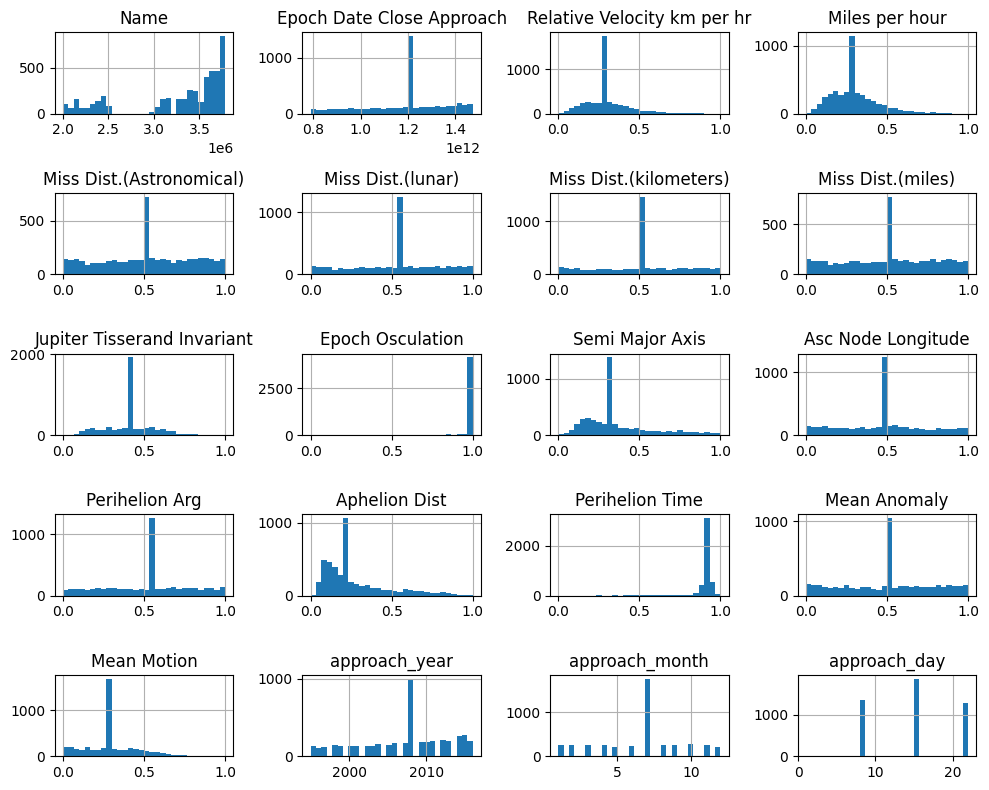

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
#yes we have to normalize data
#first we will normalize data
#List of columns to normalize (excluding date columns and categorical columns)
columns_to_normalize = [
    'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)',
    'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
    'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis',
    'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist',
    'Perihelion Time', 'Mean Anomaly', 'Mean Motion'
]

# Scale only the specified columns
df_scaled = df.copy()
df_scaled[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save the normalized dataset
df_scaled.to_csv("normalized_dataset.csv", index=False)


print("Normalization complete. The dataset has been saved as 'normalized_dataset.csv'.")

# Redefining numerical_cols

num_df = pd.read_csv("normalized_dataset.csv")
numerical_cols2 = num_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols2 = num_df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Plotting the distribution of numerical features using histogram
num_df[numerical_cols2].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


* Identify potential outliers in the numerical columns using any statistical technique (e.g.,
box plots, z-score, etc.).

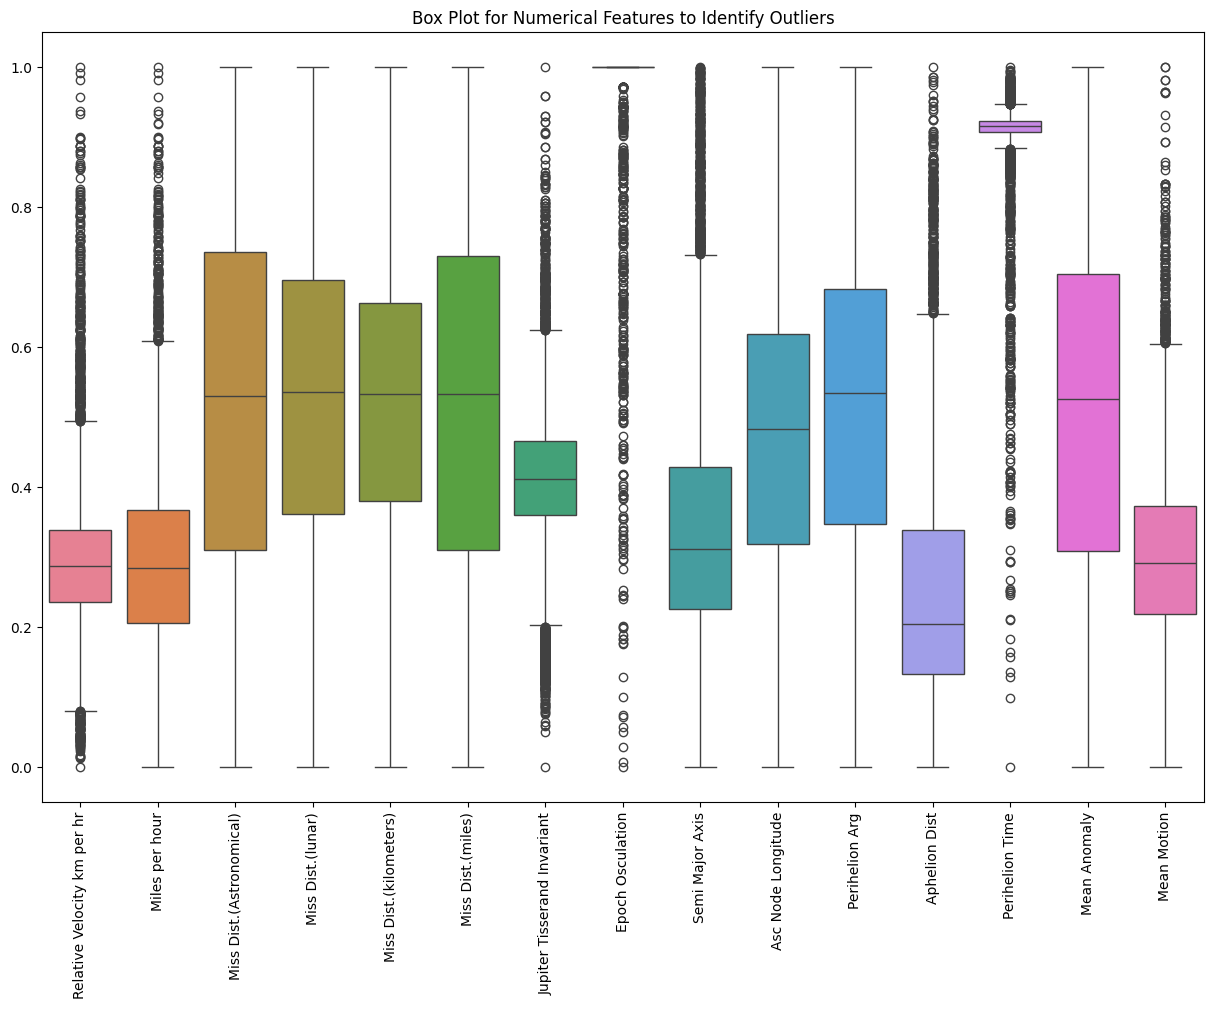

Number of potential outliers: 367
         Name  Epoch Date Close Approach Relative Velocity km per sec  \
14    3446396               7.922300e+11                         Slow   
22    3005973               7.934400e+11                         Fast   
57    2088959               8.005210e+11                    Very Fast   
87    2495829               1.202460e+12                         Slow   
121   3160737               1.202460e+12                         Slow   
...       ...                        ...                          ...   
4491  3756948               1.469170e+12                         Slow   
4513  3425295               1.471240e+12                    Very Fast   
4523  3759643               1.473320e+12                         Fast   
4526  3394709               1.473320e+12                         Slow   
4533  3772978               1.473320e+12                    Very Fast   

      Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
14        

In [7]:
# Identifying potential outliers using both box plot and zscore method

#BOXPLOT
#excluding columns like name and date because we want to find outlier of only
exclude_columns = ['Name', 'Epoch Date Close Approach', 'approach_year','approach_month','approach_day']
filtered_data = num_df[numerical_cols2].drop(columns=exclude_columns)
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Box Plot for Numerical Features to Identify Outliers")
plt.show()

# using Zscore to identify potential outliers

# Calculate Z-scores for each numerical feature
z_scores = np.abs((num_df[numerical_cols2] - num_df[numerical_cols2].mean()) / num_df[numerical_cols2].std())

# Set a threshold for identifying outliers (Z-score > 3 or < -3)
threshold = 3
outliers = (z_scores > threshold)

# Display the outliers in the dataset
outliers_df = num_df[(outliers).any(axis=1)]  # Filter rows that have at least one outlier
print("Number of potential outliers:", outliers_df.shape[0])
print(outliers_df)

# Display Z-scores for numerical columns
print("\nZ-scores of numerical columns:")
print(z_scores.head())

* Explore the relationship between different features using scatter plots or correlation
matrices.

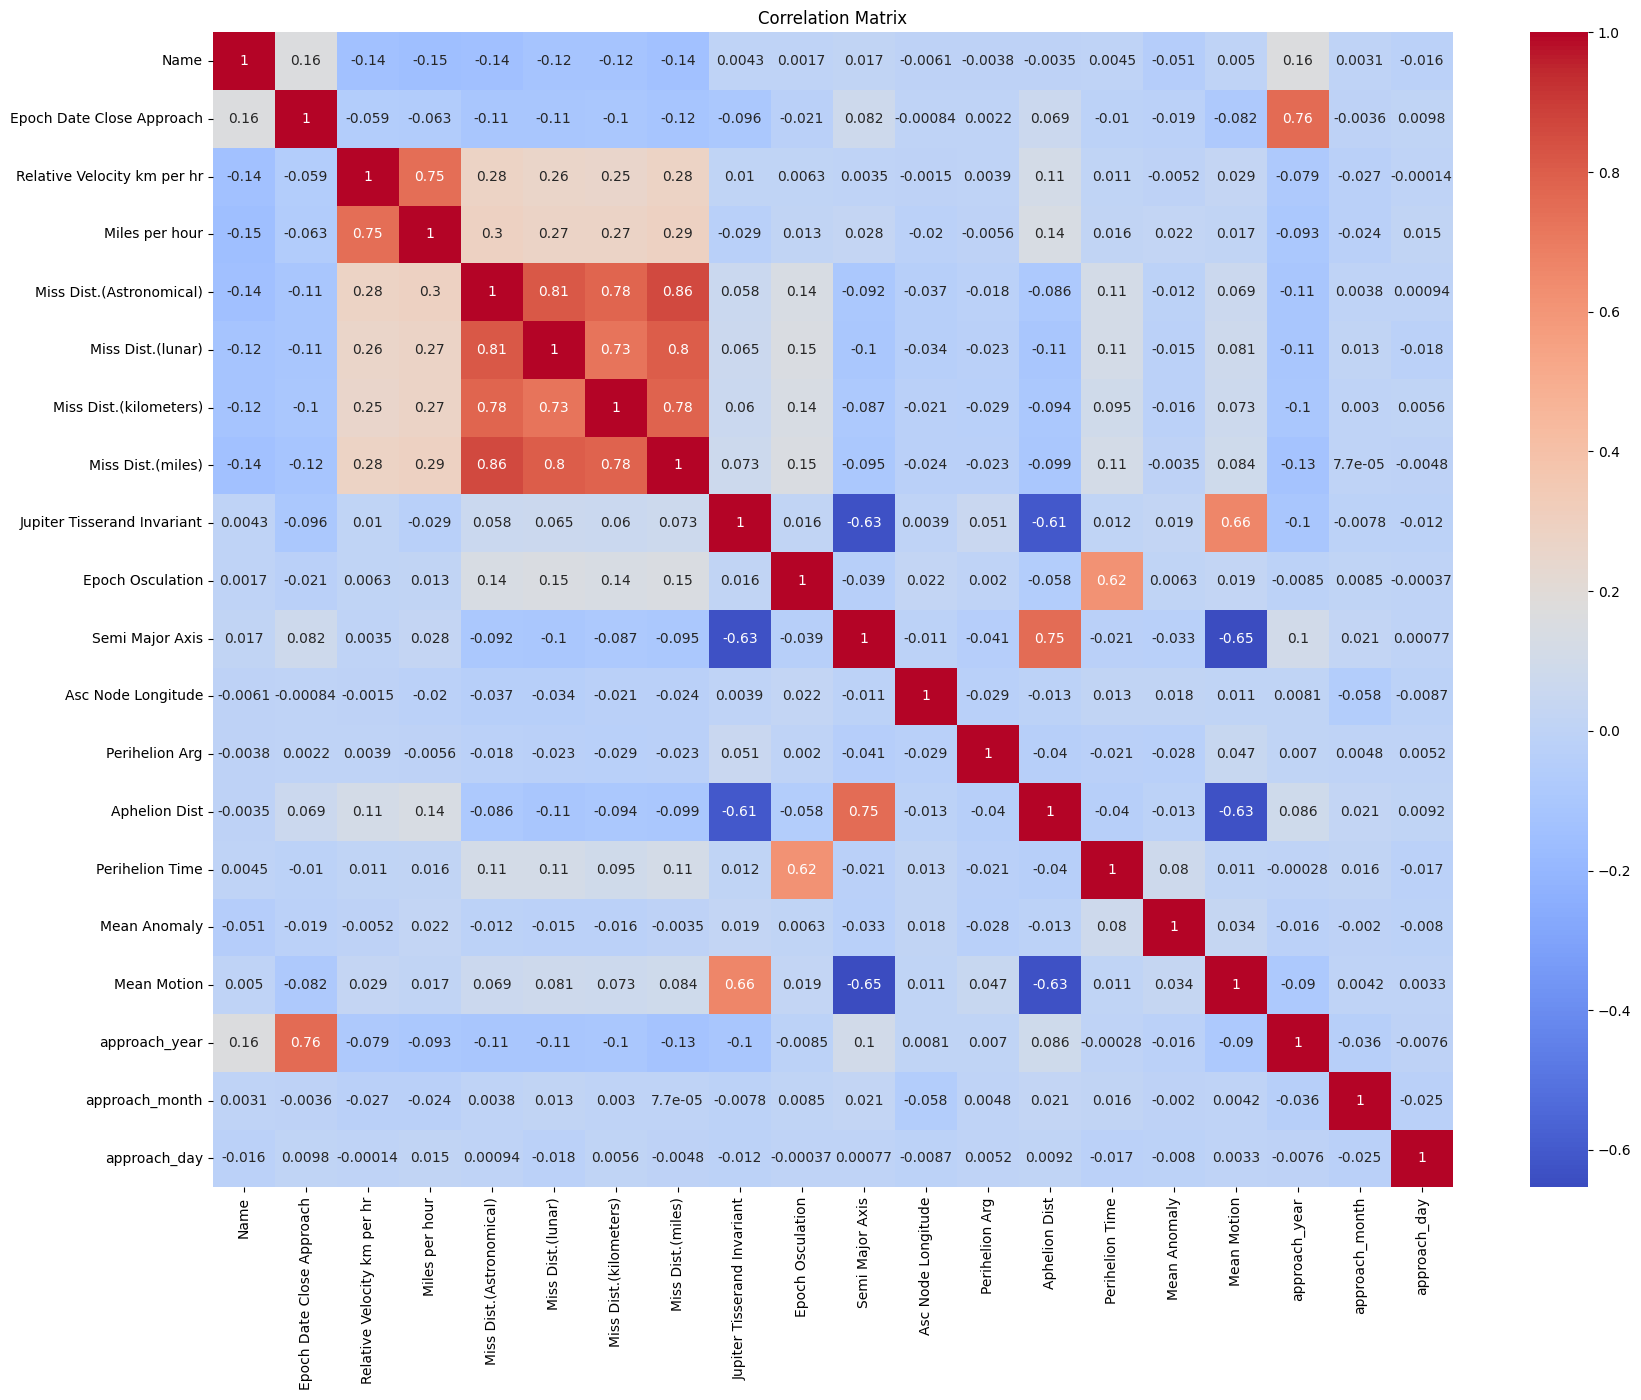

In [8]:
# Correlation matrix to explore relationships
plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Subset of the data for faster plotting
# df_sample = df.sample(500)  # Randomly select 500 rows for visualization
# sns.pairplot(df_sample[numerical_cols])
# plt.show()

# 1.3 Visualisation

* Create a pairplot using Seaborn to visualise relationships between multiple numerical
features simultaneously

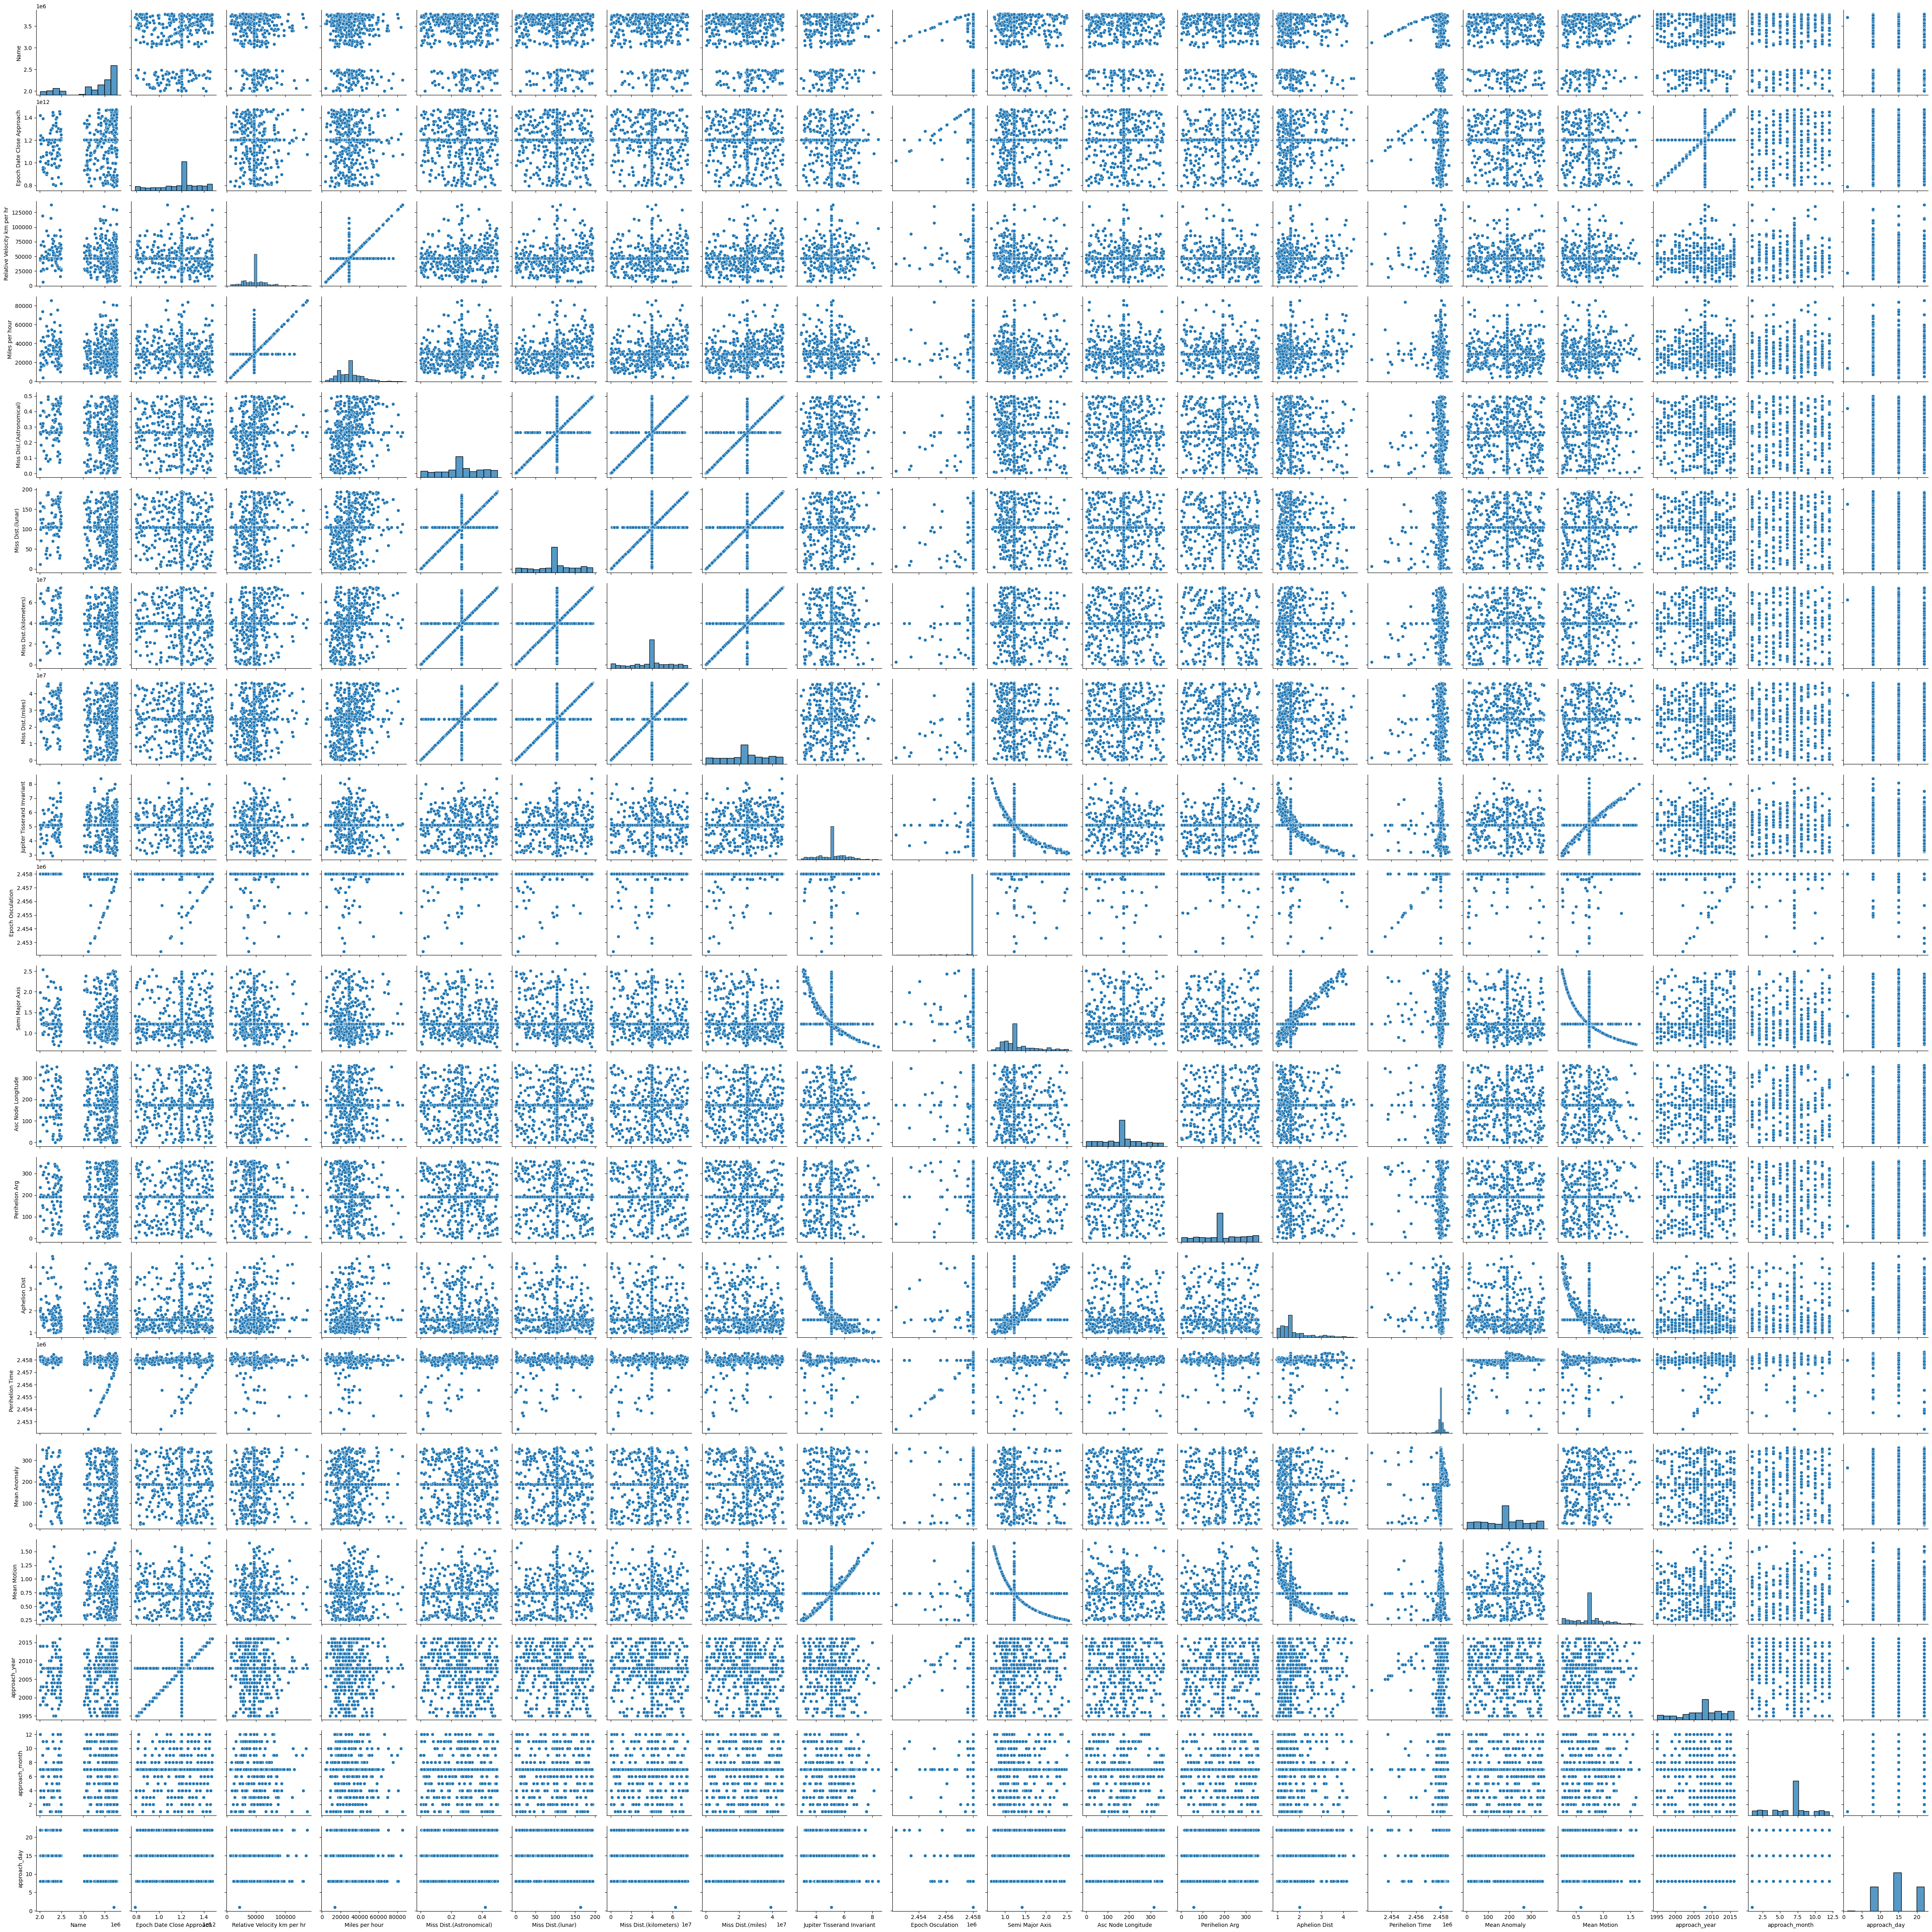

In [9]:
# creating pairplot to visualise multiple feature at once. Using Subset of the data for faster plotting it is taking 5mins+
df_sample = df.sample(500)  # Randomly select 500 rows for visualization
sns.pairplot(df_sample[numerical_cols])
plt.show()

* What do you infer from these plots? How do the diagonal plots and off-diagonal plots in
a pairplot differ in the information they provide?

**Diagonal Plots**: The plots on the diagonal represent the distribution (histograms) of individual variables. Each diagonal plot gives insight into how values are spread for a particular feature (e.g., whether the feature has a normal distribution, skewed distribution, or contains outliers). These histograms help you quickly spot patterns such as: Skewness (left or right), Uniform or normal distribution, Whether the data is concentrated in certain ranges, or Any potential data anomalies like outliers.

**Off-Diagonal Plots**: The plots off the diagonal show scatter plots between two different variables. These scatter plots help you identify relationships or correlations between two variables: Positive or negative correlation (how strongly related two variables are), Linear, non-linear, or random relationships, Patterns like clusters or outliers that might need further investigation. If the points align more closely in a linear pattern, it suggests a stronger correlation between those variables. A random spread of points indicates little to no correlation.

**Key Inferences**:Distribution Patterns (from diagonals): Each variable’s distribution can be assessed to detect whether normalization might be needed (e.g., if a variable is highly skewed). Relationships Between Variables (from off-diagonal): Pairs of variables can be examined for relationships. For example, if two variables exhibit a strong linear relationship, one might be redundant in certain models, or it might indicate a direct cause-effect relationship worth investigating.

# 1.4 Tackling Class Imbalance

* Is there a classification bias (class imbalance) in this dataset? If yes, how would you
tackle it?

Class distribution before SMOTE:
Hazardous
False    3798
True      736
Name: count, dtype: int64


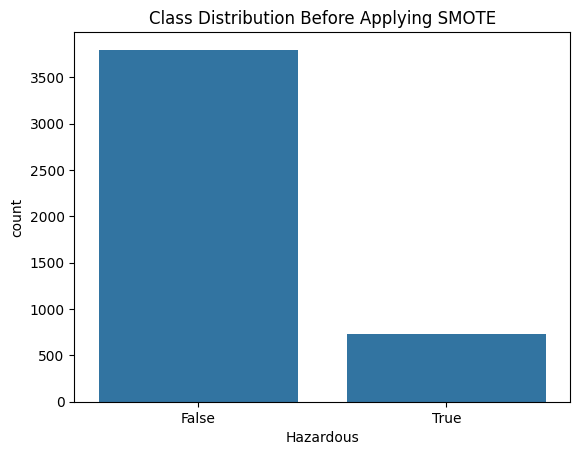

In [10]:
# Check the distribution of the target variable
# SMOTE: Synthetic Minority Oversampling Technique.
print("Class distribution before SMOTE:")
print(df['Hazardous'].value_counts())

#Visualizing the imbalance
sns.countplot(x='Hazardous', data=df)
plt.title('Class Distribution Before Applying SMOTE')
plt.show()


YES, there exist classification bias class imbalance in the dataset

to tackle this we can use SMOTE as it generates new synthetic data from a minority class in an imbalanced dataset to create a more balanced training set

Class distribution after SMOTE:
Hazardous
1    3798
0    3798
Name: count, dtype: int64


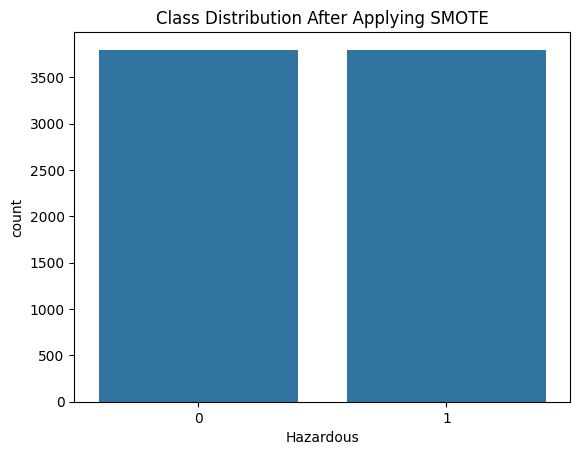

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns if they are still in the dataset
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Defining features and labels
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

#Visualizing the new distribution
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Applying SMOTE')
plt.show()


* Discuss the implication of class imbalance on model performance

<!-- Discuss the implication of class imbalance on model performance.  -->
Class imbalance poses a significant challenge in machine learning, often leading to models that perform well on the majority class but poorly on the minority class. This is particularly problematic when the minority class represents important or critical outcomes. Balancing the dataset through techniques like SMOTE, adjusting the model's learning process, and using appropriate performance metrics can help us mitigate these issues and improve the model's ability to generalize across both classes.

# **2. Numerical Interpretation and Mathematical Analysis**

# 2.1 Feature Engineering

*  Combine the approach_date, month, and year features into a single feature representing
the day of the year. Convert it into a ‘datetime’ format.

In [12]:
# Creating the 'Day of Year' feature
df['Day of Year'] = pd.to_datetime(df['approach_year'].astype(int).astype(str) + '-' +
                                   df['approach_month'].astype(int).astype(str) + '-' +
                                   df['approach_day'].astype(int).astype(str),
                                   format='%Y-%m-%d', errors='coerce').dt.dayofyear

# Check the new feature
print(df[['approach_year', 'approach_month', 'approach_day', 'Day of Year']].head())

   approach_year  approach_month  approach_day  Day of Year
0         2008.0             1.0           1.0            1
1         1995.0             1.0           1.0            1
2         1995.0             7.0           8.0          189
3         1995.0             7.0          15.0          196
4         2008.0             7.0          15.0          197


* Calculate the ratio of Miss Distance vs. Semi-major axis. Create a 'Time Until Approach'
feature based on the difference between the 'Epoch Date Close Approach' and the current
date.

In [13]:
from datetime import datetime
df['Miss Distance to Semi Major Axis Ratio'] = df['Miss Dist.(Astronomical)'] / df['Semi Major Axis']

# Convert 'Epoch Date Close Approach' to datetime
df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'], unit='ms')

# Get the current date
current_date = datetime.now()

# Calculating the difference in days between the current date and 'Epoch Date Close Approach'
df['Time Until Approach (days)'] = (df['Epoch Date Close Approach'] - current_date).dt.days

#updated dataframe
df[['Miss Dist.(Astronomical)', 'Semi Major Axis', 'Miss Distance to Semi Major Axis Ratio',
    'Epoch Date Close Approach', 'Time Until Approach (days)']].head()

Miss Dist.(Astronomical)  Semi Major Axis  \
0                  0.419483         1.407011   
1                  0.265281         1.107776   
2                  0.050956         1.458824   
3                  0.265281         1.223551   
4                  0.407832         1.225615   

   Miss Distance to Semi Major Axis Ratio Epoch Date Close Approach  \
0                                0.298137       1995-01-01 07:56:40   
1                                0.239471       2008-02-08 08:40:00   
2                                0.034930       1995-01-08 08:00:00   
3                                0.216812       1995-01-15 08:03:20   
4                                0.332757       1995-01-15 08:03:20   

   Time Until Approach (days)  
0                      -11226  
1                       -6440  
2                      -11219  
3                      -11212  
4                      -11212

* Calculate the eccentricity of the orbit, average orbital velocity, and orbital period using
Kepler’s Law

In [14]:
# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the sun (kg)
mu_sun = G * M_sun  # Standard gravitational parameter for the sun (m^3/s^2)

semi_major_axis_au = df['Semi Major Axis']  # in AU (astronomical units)
semi_major_axis_m = semi_major_axis_au * 1.496e11  # Convert AU to meters

#to calculate eccentricity
r_aphelion = df['Aphelion Dist'] * 1.496e11  # Aphelion distance in meters
r_perihelion = (2 * semi_major_axis_m) - r_aphelion  # Perihelion distance

eccentricity = (r_aphelion - r_perihelion) / (r_aphelion + r_perihelion)

# Orbital period using Kepler's Third Law (T in seconds)
orbital_period_seconds = np.sqrt((semi_major_axis_m**3) / mu_sun)

# Convert orbital period to Earth years
orbital_period_years = orbital_period_seconds / (60 * 60 * 24 * 365.25)

# Average orbital velocity
average_orbital_velocity = (2 * np.pi * semi_major_axis_m) / orbital_period_seconds

# Add the results back to the dataframe
df['Eccentricity'] = eccentricity
df['Orbital Period (years)'] = orbital_period_years
df['Average Orbital Velocity (m/s)'] = average_orbital_velocity

#results using keplers law are
df[['Semi Major Axis', 'Eccentricity', 'Orbital Period (years)', 'Average Orbital Velocity (m/s)']].head()


Semi Major Axis  Eccentricity  Orbital Period (years)  \
0         1.407011      0.425549                0.265595   
1         1.107776      0.351674                0.185546   
2         1.458824      0.348248                0.280400   
3         1.223551      0.248746                0.215380   
4         1.225615      0.297312                0.215926   

   Average Orbital Velocity (m/s)  
0                   157792.200192  
1                   177831.363356  
2                   154964.743910  
3                   169208.923225  
4                   169066.412715

* Calculate the heliocentric distance, escape velocity, and specific orbital energy.

In [15]:
#assuming
theta = 0  # For perihelion, theta = 0

#Heliocentric distance
heliocentric_distance = semi_major_axis_m * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))

#Escape velocity
escape_velocity = np.sqrt(2 * G * M_sun / heliocentric_distance)

# Specific orbital energy
specific_orbital_energy = (average_orbital_velocity**2) / 2 - (G * M_sun / heliocentric_distance)

df['Heliocentric Distance (m)'] = heliocentric_distance
df['Escape Velocity (m/s)'] = escape_velocity
df['Specific Orbital Energy (J/kg)'] = specific_orbital_energy

#Results
df[['Semi Major Axis', 'Eccentricity', 'Heliocentric Distance (m)', 'Escape Velocity (m/s)', 'Specific Orbital Energy (J/kg)']].head()

c:\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Semi Major Axis  Eccentricity  Heliocentric Distance (m)  \
0         1.407011      0.425549               1.209155e+11   
1         1.107776      0.351674               1.074427e+11   
2         1.458824      0.348248               1.422383e+11   
3         1.223551      0.248746               1.375120e+11   
4         1.225615      0.297312               1.288392e+11   

   Escape Velocity (m/s)  Specific Orbital Energy (J/kg)  
0           46859.127492                    1.135130e+10  
1           49710.355671                    1.457644e+10  
2           43204.296060                    1.107373e+10  
3           43940.490701                    1.335045e+10  
4           45395.331068                    1.326136e+10

* Calculate the Specific Angular Momentum using the formula: h=sqrt(GMa(1−e²))

In [16]:
#Using specific angular momentum formula
specific_angular_momentum = np.sqrt(G * M_sun * semi_major_axis_m * (1 - eccentricity**2))

df['Specific Angular Momentum'] = specific_angular_momentum

# Displaying results for different semimajor axis and eccentricity
df[['Semi Major Axis', 'Eccentricity', 'Specific Angular Momentum']].head()

c:\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Semi Major Axis  Eccentricity  Specific Angular Momentum
0         1.407011      0.425549               4.783573e+15
1         1.107776      0.351674               4.390810e+15
2         1.458824      0.348248               5.045608e+15
3         1.223551      0.248746               4.774497e+15
4         1.225615      0.297312               4.710495e+15

* Calculate the velocity at Perihelion and Aphelion

In [17]:
#velocity at perihelion
velocity_perihelion = np.sqrt(G * M_sun * (2 / r_perihelion - 1 / semi_major_axis_m))

#velocity at aphelion
velocity_aphelion = np.sqrt(G * M_sun * (2 / r_aphelion - 1 / semi_major_axis_m))

#Adding to the dataframe
df['Velocity at Perihelion (m/s)'] = velocity_perihelion
df['Velocity at Aphelion (m/s)'] = velocity_aphelion

#Displaying results
df[['Semi Major Axis', 'Eccentricity', 'Velocity at Perihelion (m/s)', 'Velocity at Aphelion (m/s)']].head()

c:\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Semi Major Axis  Eccentricity  Velocity at Perihelion (m/s)  \
0         1.407011      0.425549                  39561.275709   
1         1.107776      0.351674                  40866.543043   
2         1.458824      0.348248                  35472.914342   
3         1.223551      0.248746                  34720.574743   
4         1.225615      0.297312                  36561.028265   

   Velocity at Aphelion (m/s)  
0                15941.935196  
1                19601.489654  
2                17147.831166  
3                20888.145371  
4                19803.253064

* Average the Miss distance of various categories and find the closest approach distance

In [18]:
# Grouping the data by category
#example taking approach year and epochosculation as a category
average_miss_distance_by_approachyear = df.groupby('approach_year')['Miss Dist.(Astronomical)'].mean()
average_miss_distance_by_EpochOsculation = df.groupby('Epoch Osculation')['Miss Dist.(Astronomical)'].mean()
# Find the closest approach distance (minimum miss distance)
closest_approach_distance = df['Miss Dist.(Astronomical)'].min()

# Display the results
print("Average Miss Distance by Category:")
print(average_miss_distance_by_approachyear)
print("\nAverage Miss Distance by Epoch Osculation:")
print(average_miss_distance_by_EpochOsculation)

print("\nClosest Approach Distance:")
print(closest_approach_distance)


Average Miss Distance by Category:
approach_year
1995.0    0.296270
1996.0    0.274275
1997.0    0.278189
1998.0    0.264860
1999.0    0.280653
2000.0    0.260339
2001.0    0.285391
2002.0    0.281009
2003.0    0.285894
2004.0    0.259389
2005.0    0.284496
2006.0    0.245736
2007.0    0.276269
2008.0    0.258828
2009.0    0.245093
2010.0    0.265831
2011.0    0.257177
2012.0    0.253742
2013.0    0.251906
2014.0    0.236022
2015.0    0.219055
2016.0    0.232440
Name: Miss Dist.(Astronomical), dtype: float64

Average Miss Distance by Epoch Osculation:
Epoch Osculation
2450936.5    0.031804
2450990.5    0.303668
2451136.5    0.265281
2451287.5    0.019001
2451340.5    0.064578
               ...   
2457669.5    0.369059
2457703.5    0.352637
2457781.5    0.171558
2457800.5    0.333627
2458000.5    0.265176
Name: Miss Dist.(Astronomical), Length: 303, dtype: float64

Closest Approach Distance:
0.000177876


 * Calculate Synodic Period and Mean Motion using the orbital period.

In [19]:
df['Synodic Period'] = (2 * np.pi * df['Semi Major Axis']) / df['Average Orbital Velocity (m/s)']
df['Mean Motion'] = 2 * np.pi / df['Orbital Period (years)']

# Displaying as features
df[['Synodic Period', 'Mean Motion']].head()


Synodic Period  Mean Motion
0        0.000056    23.657035
1        0.000039    33.863263
2        0.000059    22.407966
3        0.000045    29.172491
4        0.000046    29.098844

# 2.2 Additional Features

* Create additional features as per your understanding of the problem for improving
accuracy. More marks are awarded for innovative and effective features.

In [20]:
from datetime import datetime
# 1. Time Until Next Close Approach (Cumulative Feature):
# Instead of just calculating "Time Until Approach," create a feature that calculates the time difference between successive close approaches,
# which could provide insight into periodicity and clustering behavior of the objects.

# Function to combine approach year, month, and day into a datetime object
def get_next_approach_date(row):
    try:
        if pd.notnull(row['approach_year']) and pd.notnull(row['approach_month']) and pd.notnull(row['approach_day']):
            return datetime(int(row['approach_year']), int(row['approach_month']), int(row['approach_day']))
        else:
            return None
    except ValueError:
        return None

# Apply the function to the dataset
df['next_approach_date'] = df.apply(get_next_approach_date, axis=1)

# Get current date
current_date = datetime.utcnow()

# Function to calculate time until next approach
def calculate_time_until_approach(approach_date):
    if approach_date:
        delta = approach_date - current_date
        return delta.days  # Time in days until next approach
    else:
        return None

# Apply the time calculation
df['time_until_approach_days'] = df['next_approach_date'].apply(calculate_time_until_approach)

# Display the result
df[['Name', 'next_approach_date', 'time_until_approach_days']].head()


C:\Users\sures\AppData\Local\Temp\ipykernel_14580\3814973775.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_date = datetime.utcnow()


Name next_approach_date  time_until_approach_days
0  3703080         2008-01-01                     -6478
1  3723955         1995-01-01                    -11226
2  2446862         1995-07-08                    -11038
3  3092506         1995-07-15                    -11031
4  3514799         2008-07-15                     -6282

In [21]:
# 2. Energy Loss in Atmosphere of earth of asteroid:
# For objects passing through Earth's atmosphere,
# a feature estimating potential energy loss or disintegration could provide insights into the survivability of impact.
#(assuming typical asteroid density)  because we dont have it in dataset
import pandas as pd
import numpy as np

# Constants for energy loss calculation
C_d = 0.47  # Drag coefficient for spherical objects
rho_atm = 1.2  # Atmospheric density near Earth's surface in kg/m^3
density = 2000  # Typical density of asteroids in kg/m^3

# Sample assumed asteroid diameter (in kilometers)
assumed_diameter_km = 0.5  # Example diameter in km (adjust based on typical asteroid sizes)
default_velocity_km_s = 20  # Default velocity in km/s if data is missing (adjust based on domain knowledge)

# Function to recalculate mass based on the assumed diameter
def assumed_mass(diameter_km):
    radius = (diameter_km / 2) * 1000  # Convert diameter to meters and find radius
    volume = (4 / 3) * np.pi * radius**3  # Volume of sphere
    mass = volume * density  # Mass in kg (assuming typical asteroid density)
    return mass

# Function to recalculate velocity using available data (Relative Velocity in km/s)
def get_velocity(row):
    if pd.notnull(row['Relative Velocity km per sec']) and row['Relative Velocity km per sec'] > 0:
        return row['Relative Velocity km per sec'] * 1000  # Convert km/s to m/s
    return default_velocity_km_s * 1000  # Default velocity if missing (in m/s)

# Calculate energy loss using the drag equation
def calculate_energy_loss(mass_kg, velocity_m_s, diameter_km):
    if mass_kg > 0 and velocity_m_s > 0:
        area_m2 = calculate_area(diameter_km)
        energy_loss = 0.5 * C_d * area_m2 * rho_atm * velocity_m_s**2
        return energy_loss / 1e9  # Convert energy loss to gigajoules (GJ)
    return 0

# Helper function to calculate the cross-sectional area of the asteroid
def calculate_area(diameter_km):
    radius_m = (diameter_km / 2) * 1000  # Convert diameter to meters and find radius
    return np.pi * radius_m**2  # Cross-sectional area of the sphere (πr²)

# Apply mass calculation based on the assumed diameter
df['assumed_mass_kg'] = assumed_mass(assumed_diameter_km)

# Calculate velocity based on the dataset, with default for missing values
df['velocity_m_s'] = df.apply(get_velocity, axis=1)

# Recalculate energy loss
df['energy_loss_gj'] = df.apply(lambda row: calculate_energy_loss(row['assumed_mass_kg'], row['velocity_m_s'], assumed_diameter_km), axis=1)

# Display the updated results for inspection
print("Final data preview with energy loss (GJ):")
print(df[['Name',  'assumed_mass_kg', 'velocity_m_s', 'energy_loss_gj']].head())



Final data preview with energy loss (GJ):
      Name  assumed_mass_kg  velocity_m_s  energy_loss_gj
0  3703080     1.308997e+11          3000      498.335135
1  3723955     1.308997e+11          1000       55.370571
2  2446862     1.308997e+11          1000       55.370571
3  3092506     1.308997e+11          3000      498.335135
4  3514799     1.308997e+11          3000      498.335135


# **3. Handling Binned Values**

● Modify the binned features that have an ordinal relationship in this manner:
(very slow = 0, slow = 1, fast = 2, very fast = 3, etc)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
#only relative velocity has ordinal relationship in the manner given above
# Ensure column is of string type
df['Relative Velocity km per sec'] = df['Relative Velocity km per sec'].astype(str)

# Remove any potential decimal points
df['Relative Velocity km per sec'] = df['Relative Velocity km per sec'].str.replace('.0', '', regex=False)

# Map numeric strings back to category names
category_mapping = {
    '0': 'Very Slow', '1': 'Slow', '2': 'Fast', '3': 'Very Fast'
}
df['Relative Velocity km per sec'] = df['Relative Velocity km per sec'].replace(category_mapping)


# Ordinal Encoding for ordered binned features
ordinal_cols = ['Relative Velocity km per sec']

# Define categories in the correct order for ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[['Very Slow', 'Slow', 'Fast', 'Very Fast']])

# Apply ordinal encoding to the specified column
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

print("After Ordinal Encoding:")
print(df[ordinal_cols].head())





#now for the other type of binned feature medium, low and high
from sklearn.preprocessing import OrdinalEncoder
# Define the category mapping for both columns
category_mapping_uncertainty = {
    '0': 'Low', '1': 'Medium', '2': 'High',
    '0.0': 'Low', '1.0': 'Medium', '2.0': 'High'  # To handle potential decimal formats
}

# Ensure Orbit Uncertainty and Orbital Period are strings
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].astype(str)
df['Orbital Period'] = df['Orbital Period'].astype(str)

# Map numeric strings to 'Low', 'Medium', 'High'
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].replace(category_mapping_uncertainty)
df['Orbital Period'] = df['Orbital Period'].replace(category_mapping_uncertainty)
#applying ordinal encoding
ordinal_cols1 = ['Orbit Uncertainity']
ordinal_cols2 = ['Orbital Period']

ordinal_encoder1 = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

# Applying encoding to the mapped columns
df[ordinal_cols1] = ordinal_encoder1.fit_transform(df[ordinal_cols1])
df[ordinal_cols2] = ordinal_encoder1.fit_transform(df[ordinal_cols2])

#After encoding
print("Encoded Orbit Uncertainty:\n", df[ordinal_cols1].head())
print("Encoded Orbital Period:\n", df[ordinal_cols2].head())


After Ordinal Encoding:
   Relative Velocity km per sec
0                           3.0
1                           1.0
2                           1.0
3                           3.0
4                           3.0
Encoded Orbit Uncertainty:
    Orbit Uncertainity
0                 2.0
1                 1.0
2                 1.0
3                 2.0
4                 1.0
Encoded Orbital Period:
    Orbital Period
0             1.0
1             1.0
2             2.0
3             1.0
4             1.0


* One-hot encode the binned features whose relationship is not strictly ordinal

In [23]:
#true false from hazardous column as it does not come under any ranking
from sklearn.preprocessing import OrdinalEncoder

# Example categorical column
categorical_cols = ['Hazardous']  # Wrap in list for correct indexing
ordinal_encoder = OrdinalEncoder()

# Fit and transform the column with OrdinalEncoder
df['Hazardous'] = ordinal_encoder.fit_transform(df[categorical_cols])

# Display the first few rows of the transformed column
df['Hazardous'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Hazardous, dtype: float64

# **4. Hazardous Classification**

* Build a robust and efficient classifier to classify asteroids as Hazardous  or Not
Hazardous

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

datetime_cols = ['Epoch Date Close Approach', 'next_approach_date']  # Adjust these column names as necessary

for col in datetime_cols:
    if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = pd.to_datetime(df[col]).astype(int) / 10**9  # Convert to Unix timestamp

# Separate features (X) and the target (y)
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']



# Categorical encoding
categorical_cols = ['Orbit Uncertainity', 'Orbital Period']  # Example categorical columns
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection (Using XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       768
         1.0       0.60      0.26      0.36       139

    accuracy                           0.86       907
   macro avg       0.74      0.61      0.64       907
weighted avg       0.84      0.86      0.84       907

Confusion Matrix:
 [[744  24]
 [103  36]]
Accuracy Score: 0.8599779492833517


* Implement K-Fold Cross Validation for training. Train the dataset for all values of K
from 2 to 10. Plot the loss and accuracy versus epochs for these K values.

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

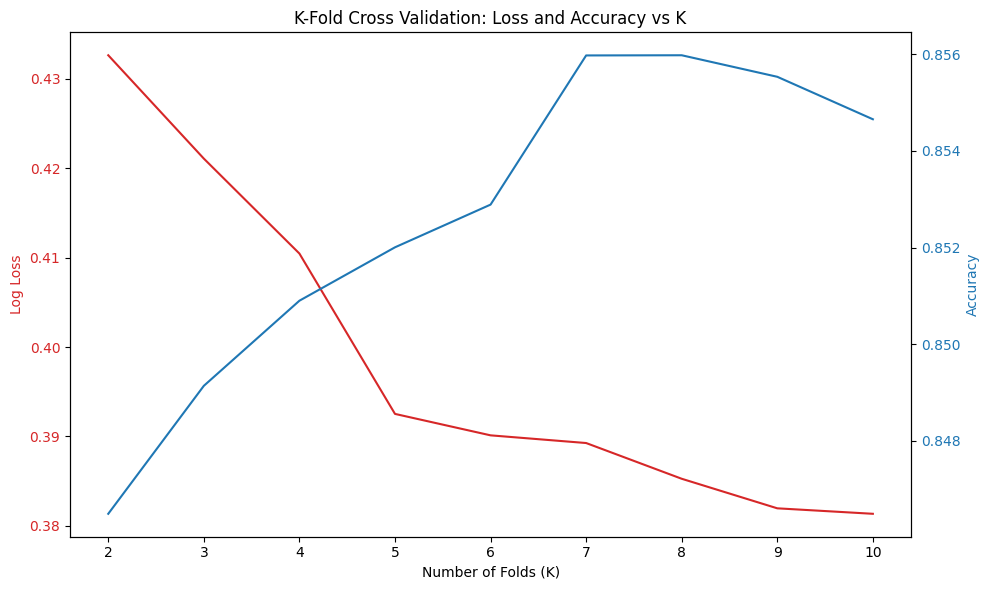

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, log_loss
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Assuming df is your DataFrame loaded from a file
# Convert datetime columns to numerical values (e.g., timestamp)
datetime_cols = ['Epoch Date Close Approach', 'next_approach_date']  # Adjust these column names as necessary

for col in datetime_cols:
    if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = pd.to_datetime(df[col]).astype(int) / 10**9  # Convert to Unix timestamp

# Separate features (X) and the target (y)
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Categorical encoding
categorical_cols = ['Orbit Uncertainity', 'Orbital Period']  # Adjust based on your dataset
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# K-Fold Cross Validation for K from 2 to 10
k_values = range(2, 11)
loss_per_epoch = []
accuracy_per_epoch = []

for k in k_values:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_losses = []

    for fold, (train_idx, test_idx) in enumerate(kfold.split(X)):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Define model
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

        # Train the model
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

        # Predict and evaluate the fold's performance
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        # Calculate accuracy and log loss for this fold
        accuracy = accuracy_score(y_test, y_pred)
        loss = log_loss(y_test, y_pred_proba)

        fold_accuracies.append(accuracy)
        fold_losses.append(loss)

    # Store average accuracy and loss for this K value
    accuracy_per_epoch.append(np.mean(fold_accuracies))
    loss_per_epoch.append(np.mean(fold_losses))

# Step 4: Plot the loss and accuracy for different K values
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot loss
ax1.set_xlabel('Number of Folds (K)')
ax1.set_ylabel('Log Loss', color='tab:red')
ax1.plot(k_values, loss_per_epoch, color='tab:red', label='Log Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(k_values, accuracy_per_epoch, color='tab:blue', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and Show
plt.title('K-Fold Cross Validation: Loss and Accuracy vs K')
fig.tight_layout()
plt.show()


* Optimise all the hyperparameters used in the classifier by selecting an appropriate
optimisation method

In [26]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

# # Assuming the dataset is already cleaned, and 'Hazardous' is the target column.
# # Feature engineering as done previously

# # Handle 'datetime' columns (assuming they exist)
# df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'])
# df['next_approach_date'] = pd.to_datetime(df['next_approach_date'])

# # Feature engineering from datetime columns
# df['days_to_next_approach'] = (df['next_approach_date'] - df['Epoch Date Close Approach']).dt.days

# # Drop original datetime columns
# df = df.drop(['Epoch Date Close Approach', 'next_approach_date'], axis=1)

# Separate features (X) and the target (y)
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Categorical encoding
categorical_cols = ['Orbit Uncertainity', 'Orbital Period']  # Example categorical columns
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Define the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter space for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1],
}

# Setup K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=kfold, verbose=2, n_jobs=-1,
                                   scoring='accuracy', random_state=42)

# Fit Randomized SearchCV
random_search.fit(X, y)

# Display the best hyperparameters and the best score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_}")

# Use the best estimator to make predictions
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
loss = log_loss(y, best_model.predict_proba(X))

print(f"Model Accuracy: {accuracy}")
print(f"Model Log Loss: {loss}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:21:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Accuracy: 0.8597243417033569
Model Accuracy: 1.0
Model Log Loss: 0.034750328682559554


* Plot the ROC curve and Confusion Matrix to quantify the performance of your classifier.

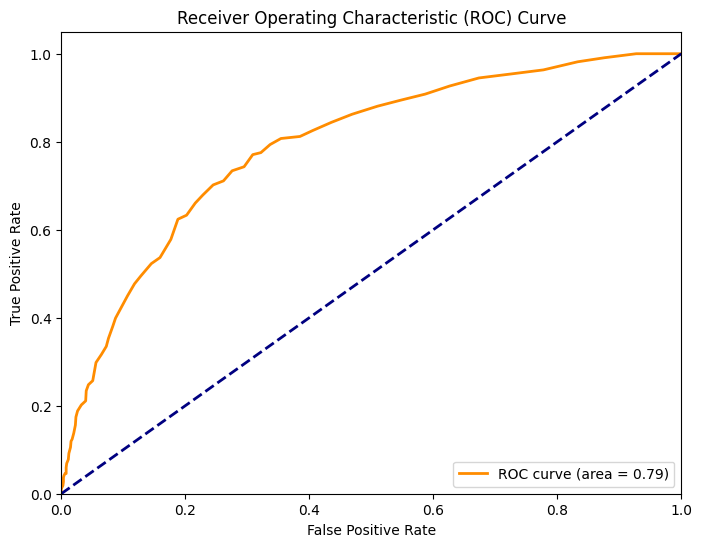

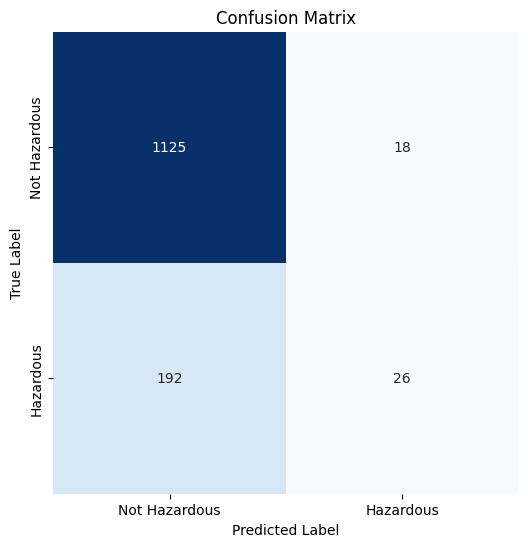

               precision    recall  f1-score   support

Not Hazardous       0.85      0.98      0.91      1143
    Hazardous       0.59      0.12      0.20       218

     accuracy                           0.85      1361
    macro avg       0.72      0.55      0.56      1361
 weighted avg       0.81      0.85      0.80      1361



In [27]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
# Features and target
X = df.drop('Hazardous', axis=1)  # Drop the target column
y = df['Hazardous']  # Target column

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Get predicted probabilities and class predictions
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability for positive class
y_pred = clf.predict(X_test)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Not Hazardous', 'Hazardous']))


* Use SHAP Values, Permutation Importance, or Partial Dependence Plots to list the most
and least useful features


=== SHAP Feature Importance Analysis ===
Preparing data for analysis...
Categorical columns to encode: []
Dataset shape: (4534, 40)
Number of features: 40
Target distribution:
Hazardous
0.0    3798
1.0     736
Name: count, dtype: int64
Training set: (3627, 40), Test set: (907, 40)

Training XGBoost model...

Calculating SHAP values...

🎯 SHAP FEATURE IMPORTANCE ANALYSIS RESULTS

📊 TOP 10 MOST USEFUL FEATURES:
--------------------------------------------------
 1. Orbit Uncertainity                  | SHAP Importance: 0.925954
 2. Miles per hour                      | SHAP Importance: 0.419665
 3. Heliocentric Distance (m)           | SHAP Importance: 0.333205
 4. Perihelion Arg                      | SHAP Importance: 0.332102
 5. Mean Anomaly                        | SHAP Importance: 0.314016
 6. Aphelion Dist                       | SHAP Importance: 0.207056
 7. Velocity at Perihelion (m/s)        | SHAP Importance: 0.203603
 8. Miss Dist.(lunar)                   | SHAP Importance: 0

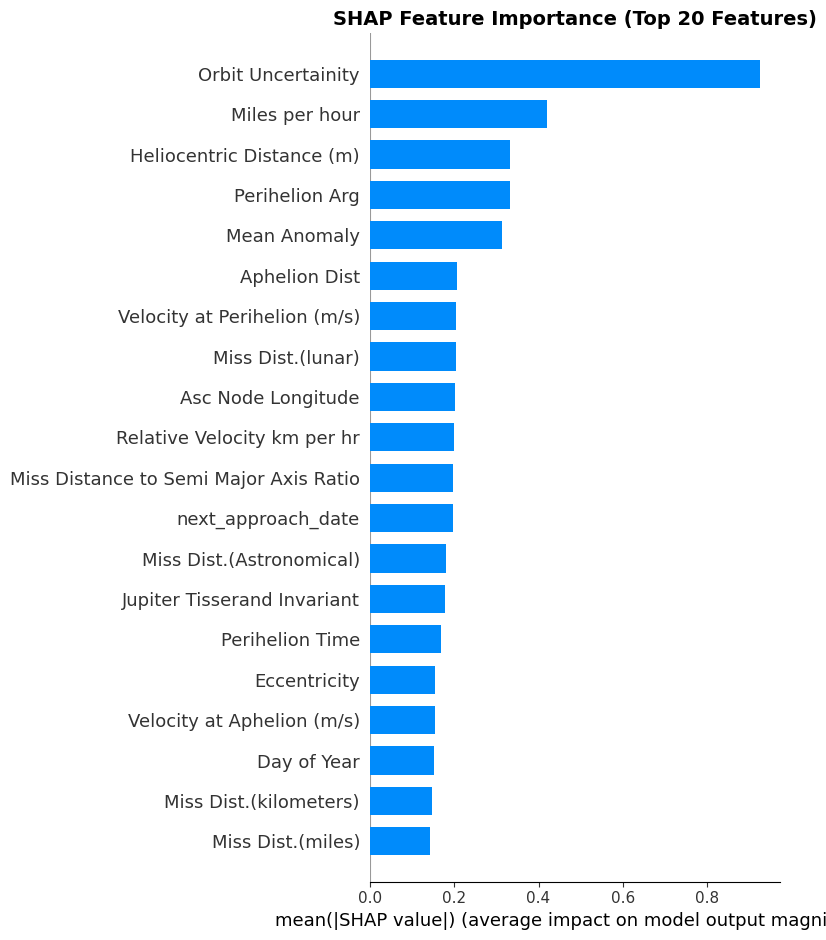

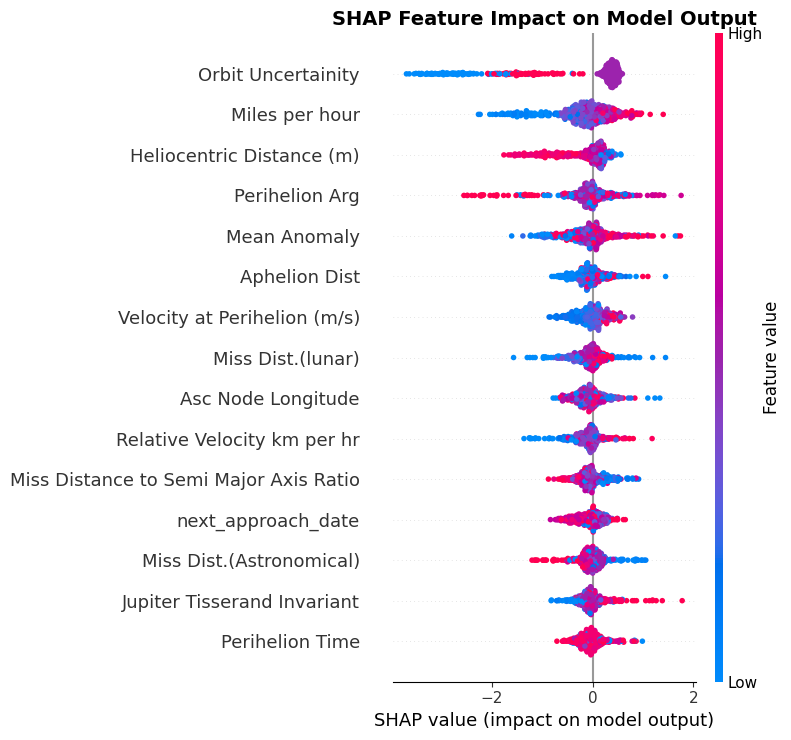



Calculating Permutation Importance...


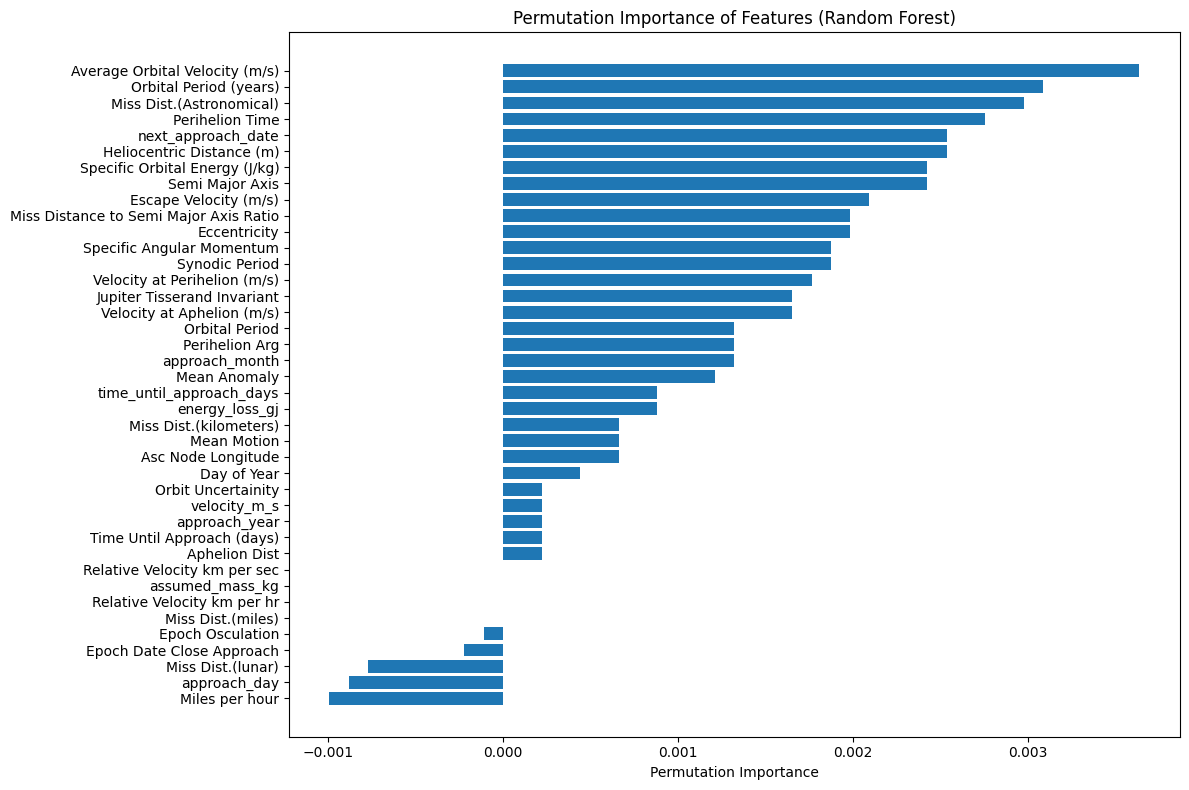


Creating Partial Dependence Plots for top features...


<Figure size 1500x1000 with 0 Axes>

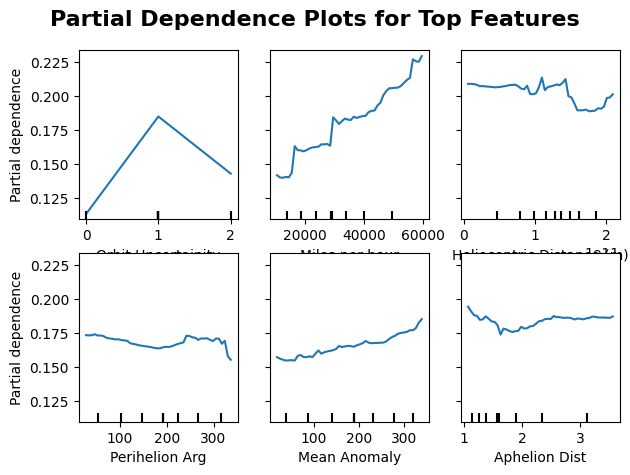


✅ Feature importance analysis completed!


In [28]:
# FIXED SHAP IMPLEMENTATION - Feature Importance Analysis
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print("=== SHAP Feature Importance Analysis ===")
print("Preparing data for analysis...")

# Data preparation with error handling
try:
    # Drop the 'Name' column from the dataset if it exists
    df_cleaned = df.copy()
    if 'Name' in df_cleaned.columns:
        df_cleaned = df_cleaned.drop('Name', axis=1)
    
    # Handle categorical columns
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
    if 'Hazardous' in categorical_cols:
        categorical_cols.remove('Hazardous')
    
    print(f"Categorical columns to encode: {categorical_cols}")
    
    # Encode categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    
    # Prepare features and target
    if 'Hazardous' not in df_cleaned.columns:
        raise ValueError("Target column 'Hazardous' not found in dataset")
    
    X = df_cleaned.drop('Hazardous', axis=1)
    y = df_cleaned['Hazardous']
    
    # Handle missing values
    X = X.fillna(X.median())
    
    print(f"Dataset shape: {X.shape}")
    print(f"Number of features: {len(X.columns)}")
    print(f"Target distribution:\n{y.value_counts()}")
    
except Exception as e:
    print(f"Error in data preparation: {e}")
    raise

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Train XGBoost model
print("\nTraining XGBoost model...")
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=6)
model_xgb.fit(X_train, y_train)

# SHAP Analysis
print("\nCalculating SHAP values...")
try:
    # Use TreeExplainer for better performance with XGBoost
    explainer = shap.TreeExplainer(model_xgb)
    
    # Calculate SHAP values for a sample (for faster computation)
    sample_size = min(500, len(X_train))
    X_sample = X_train.iloc[:sample_size]
    shap_values = explainer.shap_values(X_sample)
    
    # Calculate feature importance from SHAP values
    feature_importance = np.abs(shap_values).mean(0)
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'shap_importance': feature_importance
    }).sort_values('shap_importance', ascending=False)
    
    # Display results
    print("\n" + "="*70)
    print("🎯 SHAP FEATURE IMPORTANCE ANALYSIS RESULTS")
    print("="*70)
    
    print(f"\n📊 TOP 10 MOST USEFUL FEATURES:")
    print("-" * 50)
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<35} | SHAP Importance: {row['shap_importance']:.6f}")
    
    print(f"\n📉 TOP 10 LEAST USEFUL FEATURES:")
    print("-" * 50)
    least_important = importance_df.tail(10).iloc[::-1]  # Reverse to show least important first
    for i, (_, row) in enumerate(least_important.iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<35} | SHAP Importance: {row['shap_importance']:.6f}")
    
    print("\n" + "="*70)
    
    # Visualization 1: SHAP Bar Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False, max_display=20)
    plt.title("SHAP Feature Importance (Top 20 Features)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Visualization 2: SHAP Summary Plot (Beeswarm)
    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values, X_sample, show=False, max_display=15)
    plt.title("SHAP Feature Impact on Model Output", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in SHAP analysis: {e}")
    print("Falling back to XGBoost built-in feature importance...")
    
    # Fallback: Use XGBoost built-in feature importance
    xgb_importance = model_xgb.feature_importances_
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'xgb_importance': xgb_importance
    }).sort_values('xgb_importance', ascending=False)
    
    print("\n🔄 XGBoost Built-in Feature Importance (Fallback):")
    print("-" * 50)
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<35} | Importance: {row['xgb_importance']:.6f}")

# Permutation Importance Analysis
print("\n\nCalculating Permutation Importance...")
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

result = permutation_importance(model_rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(12, 8))
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features (Random Forest)")
plt.tight_layout()
plt.show()

# Create partial dependence plots for top features (FIXED SYNTAX)
print("\nCreating Partial Dependence Plots for top features...")
try:
    # Select top 6 features based on SHAP importance (FIXED: proper list slicing)
    if 'importance_df' in locals() and len(importance_df) > 0:
        top_features = importance_df.head(6)['feature'].tolist()
        feature_indices = [X_train.columns.get_loc(feat) for feat in top_features]
    else:
        # Fallback: use first 6 features (FIXED: proper range function)
        feature_indices = list(range(min(6, len(X_train.columns))))
    
    plt.figure(figsize=(15, 10))
    PartialDependenceDisplay.from_estimator(
        model_rf, X_train, feature_indices, 
        grid_resolution=50, n_cols=3, n_jobs=-1
    )
    plt.suptitle("Partial Dependence Plots for Top Features", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error creating partial dependence plots: {e}")

print("\n✅ Feature importance analysis completed!")


# **5. Anomaly Detection**

 Perform anomaly detection using:
(i) Any inbuilt library of your choice

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
# Clean and prepare the dataset
cleaned_data = df.drop(columns=['Name', 'Relative Velocity km per sec',
                                  'approach_year', 'approach_month', 'approach_day', 'Orbital Period',
                                  'Orbit Uncertainity'])

# Handle missing values by filling with the mean for numerical columns
cleaned_data.fillna(cleaned_data.mean(), inplace=True)

# Encode the 'Hazardous' column (if it exists) using LabelEncoder
encoder = LabelEncoder()
if 'Hazardous' in cleaned_data.columns:
    cleaned_data['Hazardous'] = encoder.fit_transform(cleaned_data['Hazardous'])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% contamination

# Fit the model and predict anomalies
cleaned_data['isolation_forest_anomaly'] = iso_forest.fit_predict(cleaned_data)

# -1 indicates an anomaly, 1 indicates a normal observation
iso_forest_anomalies = cleaned_data[cleaned_data['isolation_forest_anomaly'] == -1]

# Print the number of anomalies detected by Isolation Forest
print(f"Number of anomalies detected by Isolation Forest: {len(iso_forest_anomalies)}")

# Optional: Display the first few rows with anomaly labels
print(cleaned_data[['isolation_forest_anomaly']].head())


Number of anomalies detected by Isolation Forest: 227
   isolation_forest_anomaly
0                         1
1                         1
2                         1
3                         1
4                         1


* Perform anomaly detection using:
○ (ii) Writing your own anomaly detection algorithm.
Along with storing the results as a new column in the dataset and printing the number of anomalies detected


In [30]:
cleaned_data2 = df.drop(columns=['Name', 'Relative Velocity km per sec',
                                  'approach_year', 'approach_month', 'approach_day', 'Orbital Period',
                                  'Orbit Uncertainity'])
X=cleaned_data2
# Z-score calculation for anomaly detection
z_scores = np.abs((X - X.mean()) / X.std())

# Detect anomalies where Z-score is greater than 3 for any feature
df = X.copy()
df['Custom Anomaly'] = (z_scores > 3).any(axis=1)

# Count anomalies
anomalies_count = df['Custom Anomaly'].sum()
print("Anomalies detected by custom method:", anomalies_count)

# Print the anomaly detection results
print(df['Custom Anomaly'])

# Optionally, save the updated DataFrame
df.to_csv('updated_data_with_anomalies.csv', index=False)

Anomalies detected by custom method: 907
0       False
1       False
2       False
3       False
4       False
        ...  
4529    False
4530    False
4531    False
4532    False
4533     True
Name: Custom Anomaly, Length: 4534, dtype: bool


Compare the results from both methods by plotting a Confusion Matrix. Print the
number of examples flagged by both algorithms.

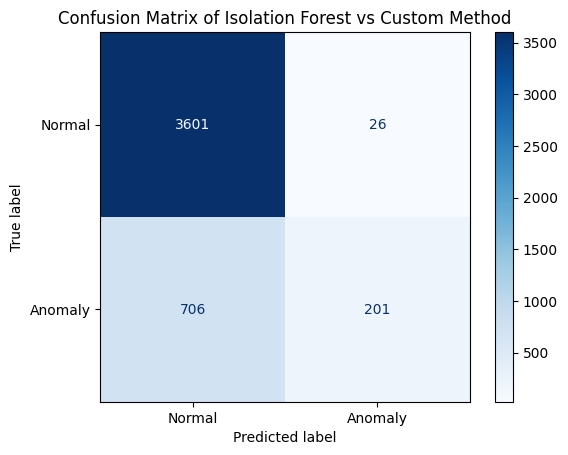

Number of anomalies detected by Isolation Forest: 227
Anomalies detected by custom method: 907
Number of examples flagged as anomalies by both methods: 201
Confusion Matrix:
 [[3601   26]
 [ 706  201]]


In [31]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert -1 to 1 for anomalies in Isolation Forest, and 1 to 0 for normal
cleaned_data['isolation_forest_anomaly'] = cleaned_data['isolation_forest_anomaly'].replace({-1: 1, 1: 0})
df['Custom Anomaly'] = df['Custom Anomaly'].astype(int)  # Ensure binary format for comparison

# Generate the confusion matrix, ensuring both columns are in cleaned_data DataFrame
conf_matrix = confusion_matrix(df['Custom Anomaly'], cleaned_data['isolation_forest_anomaly'])

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=['Normal', 'Anomaly']).plot(cmap='Blues')
plt.title('Confusion Matrix of Isolation Forest vs Custom Method')
plt.show()


# Print the number of anomalies detected by Isolation Forest
print(f"Number of anomalies detected by Isolation Forest: {len(iso_forest_anomalies)}")
# Print the number of anomalies detected by Zscore
anomalies_count = df['Custom Anomaly'].sum()
print("Anomalies detected by custom method:", anomalies_count)


# Print the number of examples flagged by both algorithms
both_flagged = ((cleaned_data['isolation_forest_anomaly'] == 1) & (df['Custom Anomaly'] == 1)).sum()
print(f"Number of examples flagged as anomalies by both methods: {both_flagged}")

# Print the confusion matrix for reference
print("Confusion Matrix:\n", conf_matrix)


## 💾 Model Serialization - Creating Pickle Files

This section saves the trained machine learning models as pickle files for future use without retraining.

In [32]:
import pickle
import joblib
from datetime import datetime
import os

# Create a directory for saving models if it doesn't exist
model_dir = "saved_models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")

print("🔄 Saving trained models as pickle files...")

# Save XGBoost Model
if 'model_xgb' in locals():
    # Method 1: Using pickle
    xgb_pickle_path = os.path.join(model_dir, "xgboost_asteroid_model.pkl")
    with open(xgb_pickle_path, 'wb') as f:
        pickle.dump(model_xgb, f)
    
    # Method 2: Using joblib (recommended for sklearn models)
    xgb_joblib_path = os.path.join(model_dir, "xgboost_asteroid_model.joblib")
    joblib.dump(model_xgb, xgb_joblib_path)
    
    print(f"✅ XGBoost model saved:")
    print(f"   - Pickle: {xgb_pickle_path}")
    print(f"   - Joblib: {xgb_joblib_path}")
else:
    print("⚠️  XGBoost model not found - please run the model training cell first")

# Save Random Forest Model
if 'model_rf' in locals():
    # Method 1: Using pickle
    rf_pickle_path = os.path.join(model_dir, "random_forest_asteroid_model.pkl")
    with open(rf_pickle_path, 'wb') as f:
        pickle.dump(model_rf, f)
    
    # Method 2: Using joblib
    rf_joblib_path = os.path.join(model_dir, "random_forest_asteroid_model.joblib")
    joblib.dump(model_rf, rf_joblib_path)
    
    print(f"✅ Random Forest model saved:")
    print(f"   - Pickle: {rf_pickle_path}")
    print(f"   - Joblib: {rf_joblib_path}")
else:
    print("⚠️  Random Forest model not found - please run the model training cell first")

# Save the feature scaler if it exists
if 'scaler' in locals():
    scaler_path = os.path.join(model_dir, "feature_scaler.pkl")
    with open(scaler_path, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"✅ Feature scaler saved: {scaler_path}")

# Save the label encoders if they exist
if 'le_dict' in locals():
    encoders_path = os.path.join(model_dir, "label_encoders.pkl")
    with open(encoders_path, 'wb') as f:
        pickle.dump(le_dict, f)
    print(f"✅ Label encoders saved: {encoders_path}")

# Save feature names for future reference
if 'X_train' in locals():
    feature_names_path = os.path.join(model_dir, "feature_names.pkl")
    feature_names = list(X_train.columns)
    with open(feature_names_path, 'wb') as f:
        pickle.dump(feature_names, f)
    print(f"✅ Feature names saved: {feature_names_path}")

# Create a model metadata file
metadata = {
    'creation_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'models_saved': [],
    'dataset_shape': None,
    'feature_count': None
}

if 'model_xgb' in locals():
    metadata['models_saved'].append('XGBoost')
if 'model_rf' in locals():
    metadata['models_saved'].append('RandomForest')
if 'X_train' in locals():
    metadata['dataset_shape'] = X_train.shape
    metadata['feature_count'] = len(X_train.columns)

metadata_path = os.path.join(model_dir, "model_metadata.pkl")
with open(metadata_path, 'wb') as f:
    pickle.dump(metadata, f)

print(f"✅ Model metadata saved: {metadata_path}")
print(f"\n📁 All files saved in: {os.path.abspath(model_dir)}")
print(f"📊 Models trained on {metadata['feature_count']} features with {metadata['dataset_shape'][0] if metadata['dataset_shape'] else 'N/A'} training samples")

# Display file sizes
print(f"\n📏 File sizes:")
for filename in os.listdir(model_dir):
    filepath = os.path.join(model_dir, filename)
    if os.path.isfile(filepath):
        size_mb = os.path.getsize(filepath) / (1024 * 1024)
        print(f"   {filename}: {size_mb:.2f} MB")


Created directory: saved_models
🔄 Saving trained models as pickle files...
✅ XGBoost model saved:
   - Pickle: saved_models\xgboost_asteroid_model.pkl
   - Joblib: saved_models\xgboost_asteroid_model.joblib
✅ Random Forest model saved:
   - Pickle: saved_models\random_forest_asteroid_model.pkl
   - Joblib: saved_models\random_forest_asteroid_model.joblib
✅ Feature scaler saved: saved_models\feature_scaler.pkl
✅ Feature names saved: saved_models\feature_names.pkl
✅ Model metadata saved: saved_models\model_metadata.pkl

📁 All files saved in: c:\Users\sures\Downloads\Cosmic collsion\Cosmic-Collision-Analysing-Asteroid-Risks-with-Data\saved_models
📊 Models trained on 40 features with 3627 training samples

📏 File sizes:
   feature_names.pkl: 0.00 MB
   feature_scaler.pkl: 0.00 MB
   model_metadata.pkl: 0.00 MB
   random_forest_asteroid_model.joblib: 5.90 MB
   random_forest_asteroid_model.pkl: 5.89 MB
   xgboost_asteroid_model.joblib: 0.24 MB
   xgboost_asteroid_model.pkl: 0.24 MB
